In [32]:
#Importing packages, setting style for charts

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd as pt
import warnings
import sqlite3
import zipfile
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [33]:
conn = sqlite3.connect('zippedData/im.db/im.db')

q = """

WITH living_directors AS(
SELECT primary_title, start_year, genres, primary_name, death_year, primary_profession 
FROM movie_basics mb
INNER JOIN directors d
    ON mb.movie_id = d.movie_id
INNER JOIN persons p
    ON d.person_id = p.person_id
WHERE primary_profession LIKE '%director%'
GROUP BY mb.movie_id
HAVING p.death_year is NULL
)

SELECT * FROM living_directors

"""

director_df = pd.read_sql(q, conn)
living_directors_df = pd.DataFrame(director_df)


In [34]:
living_directors_df
living_directors_df['title_and_year'] = living_directors_df['primary_title'] + ' ' + living_directors_df['start_year'].apply(lambda x: str(x))
living_directors_df


,primary_title,start_year,genres,primary_name,death_year,primary_profession,title_and_year
0,Bigfoot,2017,"Horror,Thriller",Mc Jones,None,"actor,director",Bigfoot 2017
1,Pál Adrienn,2010,Drama,Ágnes Kocsis,None,"director,writer,producer",Pál Adrienn 2010
2,Cooper and Hemingway: The True Gen,2013,Documentary,John Mulholland,None,"director,writer,producer",Cooper and Hemingway: The True Gen 2013
3,Children of the Green Dragon,2010,Drama,Bence Miklauzic,None,"director,writer,assistant_director",Children of the Green Dragon 2010
4,The Tragedy of Man,2011,"Animation,Drama,History",Marcell Jankovics,None,"writer,director,animation_department",The Tragedy of Man 2011
...,...,...,...,...,...,...,...
130466,The Secret of China,2019,"Adventure,History,War",Jixing Wang,None,"director,writer",The Secret of China 2019
130467,Kuambil Lagi Hatiku,2019,Drama,Azhar Kinoi Lubis,None,director,Kuambil Lagi Hatiku 2019
130468,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary,Ana Célia de Oliveira,None,"producer,director,writer",Rodolpho Teóphilo - O Legado de um Pioneiro 2015
130469,Dankyavar Danka,2013,Comedy,Kanchan Nayak,None,director,Dankyavar Danka 2013


In [35]:
#Reading in the dataframes

movie_info=pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
tmdb=pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
movie_gross=pd.read_csv("zippedData/bom.movie_gross.csv.gz")
reviews=pd.read_csv("zippedData/rt.reviews.tsv.gz", error_bad_lines=False, sep='\t', encoding= 'unicode_escape')

In [36]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [37]:
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [38]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [39]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [40]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [41]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


Adding in the tmdb genre id dictionary:

In [42]:
tmdb_genres={
'Action':        28,
'Adventure':       12,
'Animation':       16,
'Comedy':          35,
'Crime':           80,
'Documentary':     99,
'Drama':           18,
'Family':          10751,
'Fantasy':         14,
'History':         36,
'Horror':          27,
'Music':           10402,
'Mystery':        9648,
'Romance':         10749,
'Science Fiction': 878,
'TV Movie':        10770,
'Thriller':        53,
'War':             10752,
'Western':         37}

#### First step - cleaning the data.

In [43]:
#Cleaning tmdb to remove dupes. Adding a column including title and year to prepare for merge.
tmdb['title_and_year'] = tmdb['original_title'] + ' ' + tmdb['release_date'].apply(lambda x: x[:4])
tmdb = tmdb.drop_duplicates(subset='id', keep='first')
tmdb = tmdb.drop_duplicates(subset='title_and_year', keep='first')
tmdb['title_and_year'].value_counts()

Shark Lake 2015                                                                     1
James Bond - 50th Anniversary: Bonus Features 2012                                  1
Bel Ami 2012                                                                        1
Theeb‎‎ 2015                                                                        1
Dogwalker 2016                                                                      1
                                                                                   ..
The Newspaperman: The Life and Times of Ben Bradlee 2017                            1
Край 2010                                                                           1
Mother Krampus 2: Slay Ride 2018                                                    1
Bruce Springsteen: The Promise - The Making of Darkness on the Edge of Town 2010    1
Christmas Cookies 2016                                                              1
Name: title_and_year, Length: 25415, dtype: int64

In [44]:
#Creating a matching column in movie_budgets to prepare for merge
movie_budgets['title_and_year'] = movie_budgets['movie']+' ' +movie_budgets['release_date'].apply(lambda x: x[-4:])
movie_budgets['title_and_year'].value_counts()

Home 2009                                  2
Breathless 1983                            1
Shallow Hal 2001                           1
The Life Aquatic with Steve Zissou 2004    1
Stuck 2008                                 1
                                          ..
Knocked Up 2007                            1
Hail, Caesar! 2016                         1
Alien: Covenant 2017                       1
May 2003                                   1
Star Trek: Insurrection 1998               1
Name: title_and_year, Length: 5781, dtype: int64

In [45]:
#Creating numeric columns to represent Budget and Revenue
movie_budgets['revenue']=movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['budget']=movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)

#Removing duplicates
# movie_budgets=movie_budgets.drop_duplicates(subset='title_and_year', keep='first')

### Creating a new dataframe to compare revenue, genres, and ratings.

In [46]:
#Merging the two dataframes. Inner merge so that we can examine movies for which we have data on both budget and tmdb votes.
tmdb_and_budgets=pd.merge(movie_budgets, tmdb, how='inner', on='title_and_year')
#Dropping rows that have $0 as the value for revenue. Further research showed that many of these movies were released directly to streaming services.
tmdb_and_budgets=tmdb_and_budgets.loc[tmdb_and_budgets['revenue']!=0]
tmdb_and_budgets=pd.merge(tmdb_and_budgets, living_directors_df, how='inner', on='title_and_year')
tmdb_and_budgets

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,title_and_year,revenue,budget,Unnamed: 0,...,release_date_y,title,vote_average,vote_count,primary_title,start_year,genres,primary_name,death_year,primary_profession
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011,1.045664e+09,410600000,2470,...,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,Pirates of the Caribbean: On Stranger Tides,2011,"Action,Adventure,Fantasy",Rob Marshall,None,"director,miscellaneous,producer"
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015,1.403014e+09,330600000,14169,...,2015-05-01,Avengers: Age of Ultron,7.3,13457,Avengers: Age of Ultron,2015,"Action,Adventure,Sci-Fi",Joss Whedon,None,"writer,producer,director"
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Avengers: Infinity War 2018,2.048134e+09,300000000,23811,...,2018-04-27,Avengers: Infinity War,8.3,13948,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",Joe Russo,None,"producer,director,writer"
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",Justice League 2017,6.559452e+08,300000000,20623,...,2017-11-17,Justice League,6.2,7510,Justice League,2017,"Action,Adventure,Fantasy",Zack Snyder,None,"producer,director,writer"
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",Spectre 2015,8.796209e+08,300000000,14175,...,2015-11-06,Spectre,6.4,6719,Spectre,2015,"Action,Adventure,Thriller",Sam Mendes,None,"producer,director,miscellaneous"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,6,"Dec 31, 2011",Absentia,"$70,000",$0,"$8,555",Absentia 2011,8.555000e+03,70000,2614,...,2011-03-03,Absentia,5.9,175,Absentia,2011,"Drama,Horror,Mystery",Mike Flanagan,None,"editor,writer,director"
1195,6,"Dec 31, 2011",Absentia,"$70,000",$0,"$8,555",Absentia 2011,8.555000e+03,70000,2614,...,2011-03-03,Absentia,5.9,175,Absentia,2011,Sci-Fi,Steven Young,None,"director,actor,writer"
1196,20,"Jul 31, 2015",Counting,"$50,000","$8,374","$8,374",Counting 2015,8.374000e+03,50000,16645,...,2015-07-31,Counting,8.3,3,Counting,2015,Documentary,Jem Cohen,None,"director,cinematographer,editor"
1197,32,"Feb 11, 2011",Raymond Did It,"$40,000","$3,632","$3,632",Raymond Did It 2011,3.632000e+03,40000,3576,...,2011-03-27,Raymond Did It,3.7,8,Raymond Did It,2011,Horror,Travis Legge,None,"editor,writer,director"


In this section we will conduct linear regression tests on the variables budget, vote average, and revenue to see how they are related.

In [47]:
X=tmdb_and_budgets['budget']
y=tmdb_and_budgets['vote_average']
model=sm.OLS(y, sm.add_constant(X))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vote_average   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     25.00
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           6.57e-07
Time:                        23:20:08   Log-Likelihood:                -1461.0
No. Observations:                1199   AIC:                             2926.
Df Residuals:                    1197   BIC:                             2936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2253      0.031    199.417      0.000       6.164       6.287
budget      2.078e-09   4.16e-10      5.000      0.000    1.26e-09    2.89e-09
==============================================================================
Omnibus:                       21.579   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.566
Skew:                          -0.266   Prob(JB):                     4.63e-06
Kurtosis:                       3.457   Cond. No.                     9.92e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

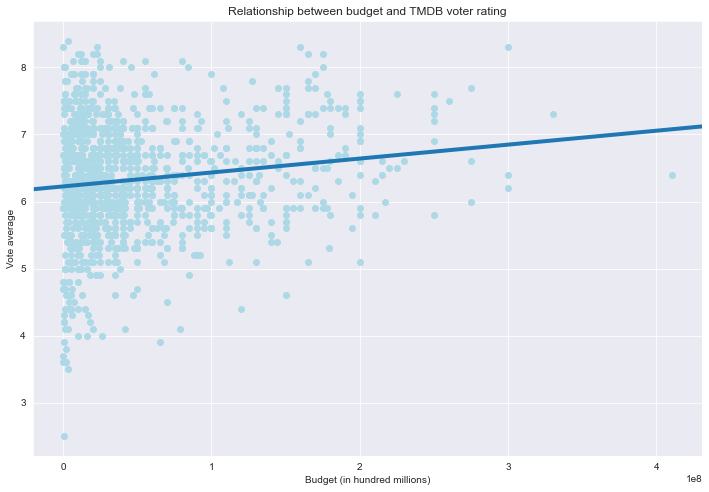

In [48]:
fig, ax=plt.subplots(figsize=(12,8))
ax.scatter(X, y, color='lightblue')
ax.set_xlabel('Budget (in hundred millions)')
ax.set_ylabel('Vote average')
ax.set_title('Relationship between budget and TMDB voter rating')
sm.graphics.abline_plot(model_results=results, ax=ax, linewidth=4);

In [49]:
X=tmdb_and_budgets['budget']
y=tmdb_and_budgets['revenue']
model=sm.OLS(y, sm.add_constant(X))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2006.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          4.25e-258
Time:                        23:20:08   Log-Likelihood:                -24278.
No. Observations:                1199   AIC:                         4.856e+04
Df Residuals:                    1197   BIC:                         4.857e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.101e+06   5.74e+06     -1.411      0.159   -1.94e+07    3.16e+06
budget         3.4224      0.076     44.788      0.000       3.273       3.572
==============================================================================
Omnibus:                      570.121   Durbin-Watson:                   1.425
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6152.926
Skew:                           1.922   Prob(JB):                         0.00
Kurtosis:                      13.411   Cond. No.                     9.92e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

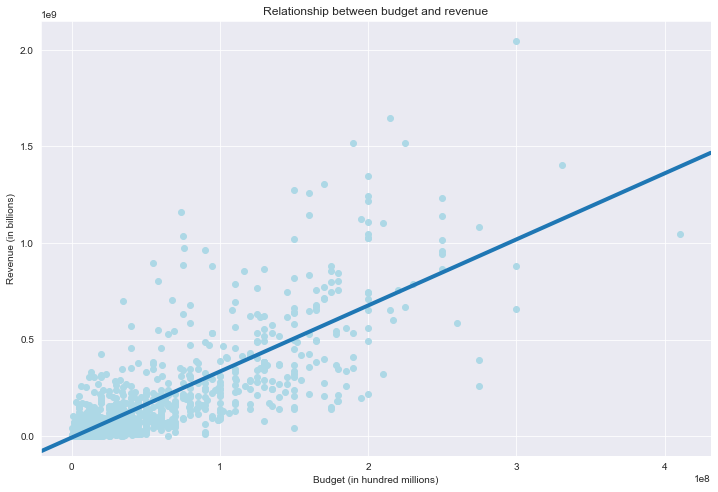

In [50]:
fig, ax=plt.subplots(figsize=(12,8))
ax.scatter(X, y, color='lightblue')
ax.set_xlabel('Budget (in hundred millions)')
ax.set_ylabel('Revenue (in billions)')
ax.set_title('Relationship between budget and revenue')
sm.graphics.abline_plot(model_results=results, ax=ax, linewidth=4);

In [51]:
X=tmdb_and_budgets['budget']
y=tmdb_and_budgets['revenue']
model=sm.OLS(y, sm.add_constant(X))
results=model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2006.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          4.25e-258
Time:                        23:20:08   Log-Likelihood:                -24278.
No. Observations:                1199   AIC:                         4.856e+04
Df Residuals:                    1197   BIC:                         4.857e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.101e+06   5.74e+06     -1.411      0.159   -1.94e+07    3.16e+06
budget         3.4224      0.076     44.788      0.000       3.273       3.572
==============================================================================
Omnibus:                      570.121   Durbin-Watson:                   1.425
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6152.926
Skew:                           1.922   Prob(JB):                         0.00
Kurtosis:                      13.411   Cond. No.                     9.92e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We will examine the most common studios from the movie info dataset.

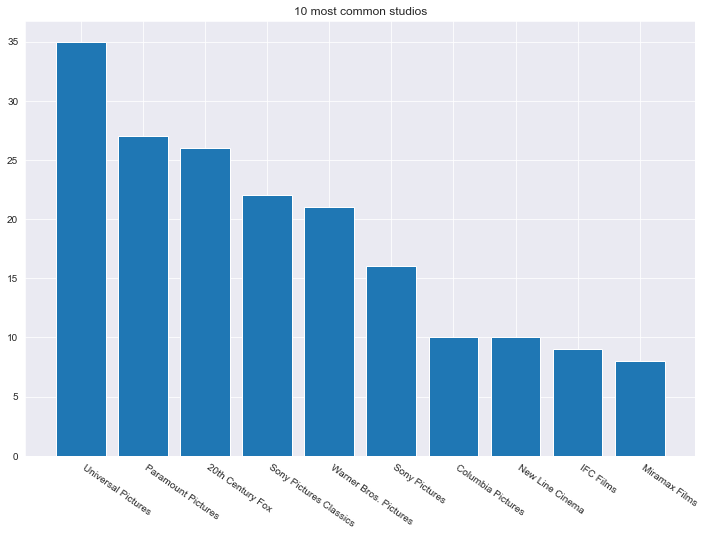

In [52]:
fig, ax=plt.subplots(figsize=(12,8))
ax.bar(movie_info['studio'].value_counts()[:10].index, movie_info['studio'].value_counts()[:10].values)
ax.set_xticklabels(movie_info['studio'].value_counts()[:10].index, rotation=-35, ha='left')
ax.set_title('10 most common studios');

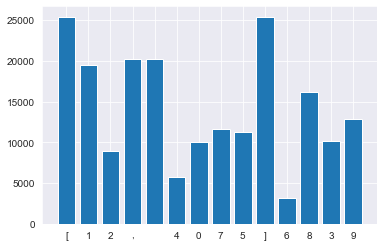

In [53]:
genre_counts={}
for row in tmdb['genre_ids']:
    for l in row:
        if l in genre_counts.keys():
            genre_counts[l]+=1
        else:
            genre_counts[l]=1

fig, ax=plt.subplots()
ax.bar(genre_counts.keys(), genre_counts.values());

Examining year and revenue:

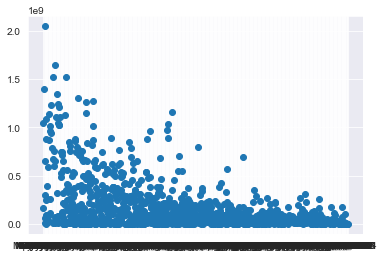

In [54]:
fig, ax=plt.subplots()
ax.scatter(tmdb_and_budgets['release_date_x'], tmdb_and_budgets['revenue'])

As we will show below, year is not a good predictor of revenue.

In [55]:
tmdb_and_budgets['year']=tmdb_and_budgets['release_date_y'].apply(lambda x: x[:4]).astype(int)
revenue_by_year=tmdb_and_budgets.groupby('year')['revenue'].mean()

In [56]:
X=revenue_by_year.index
y=revenue_by_year.values
model=sm.OLS(y, sm.add_constant(X))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     25.95
Date:                Tue, 20 Jun 2023   Prob (F-statistic):            0.00141
Time:                        23:20:26   Log-Likelihood:                -160.21
No. Observations:                   9   AIC:                             324.4
Df Residuals:                       7   BIC:                             324.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.939e+10   3.84e+09     -5.051      0.001   -2.85e+10   -1.03e+10
x1          9.706e+06   1.91e+06      5.094      0.001     5.2e+06    1.42e+07
==============================================================================
Omnibus:                        0.661   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.528
Skew:                          -0.046   Prob(JB):                        0.768
Kurtosis:                       1.817   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We will examine the relationship between genres and revenue by creating a dictionary. 

In [57]:

#reset index due to dropping rows
tmdb_and_budgets.reset_index(inplace=True)

#removing unnecessary columns
tmdb_and_budgets.drop(['index', 'id_x', 'id_y', 'Unnamed: 0'], axis=1, inplace=True)

tmdb['genre_ids']=tmdb['genre_ids'].str.split()
tmdb_and_budgets['genre_ids']=tmdb_and_budgets['genre_ids'].str.split()

tmdb_and_budgets.tail()

,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,title_and_year,revenue,budget,genre_ids,original_language,...,title,vote_average,vote_count,primary_title,start_year,genres,primary_name,death_year,primary_profession,year
1194,"Dec 31, 2011",Absentia,"$70,000",$0,"$8,555",Absentia 2011,8555.0,70000,"[[9648,, 27,, 53]]",en,...,Absentia,5.9,175,Absentia,2011,"Drama,Horror,Mystery",Mike Flanagan,None,"editor,writer,director",2011
1195,"Dec 31, 2011",Absentia,"$70,000",$0,"$8,555",Absentia 2011,8555.0,70000,"[[9648,, 27,, 53]]",en,...,Absentia,5.9,175,Absentia,2011,Sci-Fi,Steven Young,None,"director,actor,writer",2011
1196,"Jul 31, 2015",Counting,"$50,000","$8,374","$8,374",Counting 2015,8374.0,50000,[[99]],en,...,Counting,8.3,3,Counting,2015,Documentary,Jem Cohen,None,"director,cinematographer,editor",2015
1197,"Feb 11, 2011",Raymond Did It,"$40,000","$3,632","$3,632",Raymond Did It 2011,3632.0,40000,[[27]],en,...,Raymond Did It,3.7,8,Raymond Did It,2011,Horror,Travis Legge,None,"editor,writer,director",2011
1198,"Sep 1, 2015",Exeter,"$25,000",$0,"$489,792",Exeter 2015,489792.0,25000,"[[53,, 27]]",en,...,Exeter,4.7,121,Exeter,2015,"Horror,Mystery,Thriller",Marcus Nispel,None,"director,producer,writer",2015


In [58]:
bad_values=[tmdb_and_budgets['genre_ids'].iloc[1451]]
tmdb_and_budgets=tmdb_and_budgets.loc[~tmdb_and_budgets['genre_ids'].isin(bad_values)]

tmdb_genres_new={}
for v, k in zip(tmdb_genres.values(), tmdb_genres.keys()):
    tmdb_genres_new[str(v)]=k

def genre_fixer(g_i):
    if len(g_i)>1:
        cleaned_g_i=[]
        cleaned_g_i.append(g_i[0].split('[')[1].split(',')[0])
        for g in g_i[1:-1]:
            cleaned_g_i.append(g.split(',')[0])
        cleaned_g_i.append(g_i[-1].split(']')[0])
        return cleaned_g_i
    elif len(g_i)==1:
        cleaned_g_i=[]
        cleaned_g_i.append(g_i[0].split('[')[1].split(']')[0])
        return cleaned_g_i
    
def genre_mapper(g_i):
    cleaned_g_i=[]
    for g in g_i:
        cleaned_g_i.append(tmdb_genres_new[g])
    return cleaned_g_i

tmdb_and_budgets['genre_ids']=tmdb_and_budgets['genre_ids'].apply(genre_fixer)
tmdb_and_budgets['genre_ids']=tmdb_and_budgets['genre_ids'].apply(genre_mapper)

#resetting index and dropping dupe columns again after removing rows
tmdb_and_budgets.reset_index(inplace=True)
tmdb_and_budgets.drop(['index'], axis=1, inplace=True)
tmdb_and_budgets

IndexError: single positional indexer is out-of-bounds

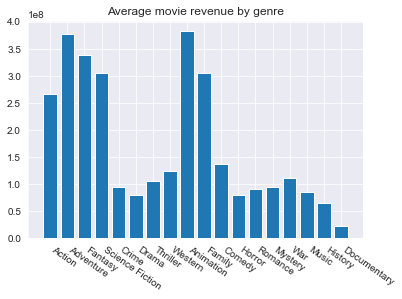

In [ ]:
genre_and_revenue={}
for row in tmdb_and_budgets.index:
    g_ids=tmdb_and_budgets.iloc[row]['genre_ids']
    rev=tmdb_and_budgets.iloc[row]['revenue']
    for g in g_ids:
        if g in genre_and_revenue.keys():
            genre_and_revenue[g]=np.append(genre_and_revenue[g], rev)
        else:
            genre_and_revenue[g]=np.array([rev])

genre_and_revenue_average={}
for g in genre_and_revenue.keys():
    genre_and_revenue_average[g]=genre_and_revenue[g].mean()

fig, ax=plt.subplots()
ax.bar(genre_and_revenue_average.keys(), genre_and_revenue_average.values())
ax.set_title('Average movie revenue by genre')
ax.set_xticklabels(genre_and_revenue_average.keys(), rotation=-35, ha='left');

In [ ]:
#checking to see if genre has a statistically significant impact on revenue
stats.f_oneway(*genre_and_revenue.values())

F_onewayResult(statistic=44.84863384460695, pvalue=3.4563026597519652e-137)

Since the p-value is extremely small and less than 0.05, we conclude that genre does have a statistically significant impact on revenue.

We will now replace the genre ids with the actual genre names, and then analyze the ratio of revenue to budget by genre.

In [ ]:
tmdb_and_budgets['genre_ids']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Action, Fantasy]
2                [Action, Adventure, Science Fiction]
3                        [Adventure, Action, Fantasy]
4       [Action, Adventure, Fantasy, Science Fiction]
                            ...                      
1497                         [Romance, Comedy, Drama]
1498                                    [Documentary]
1499                                         [Horror]
1500                                          [Drama]
1501                               [Thriller, Horror]
Name: genre_ids, Length: 1502, dtype: object

In [ ]:
tmdb_and_budgets['revenue_to_budget']=tmdb_and_budgets['revenue']/tmdb_and_budgets['budget']
tmdb_and_budgets

,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,title_and_year,revenue,budget,genre_ids,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,year,revenue_to_budget
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar 2009,2.776345e+09,425000000,"[Action, Adventure, Fantasy, Science Fiction]",en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,2009,6.532577
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides 2011,1.045664e+09,410600000,"[Adventure, Action, Fantasy]",en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,2011,2.546673
2,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron 2015,1.403014e+09,330600000,"[Action, Adventure, Science Fiction]",en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457,2015,4.243841
3,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Avengers: Infinity War 2018,2.048134e+09,300000000,"[Adventure, Action, Fantasy]",en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,2018,6.827114
4,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",Justice League 2017,6.559452e+08,300000000,"[Action, Adventure, Fantasy, Science Fiction]",en,Justice League,34.953,2017-11-17,Justice League,6.2,7510,2017,2.186484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,"Nov 12, 2010",Tiny Furniture,"$50,000","$391,674","$424,149",Tiny Furniture 2010,4.241490e+05,50000,"[Romance, Comedy, Drama]",en,Tiny Furniture,6.695,2010-11-12,Tiny Furniture,5.9,82,2010,8.482980
1498,"Jul 31, 2015",Counting,"$50,000","$8,374","$8,374",Counting 2015,8.374000e+03,50000,[Documentary],en,Counting,0.600,2015-07-31,Counting,8.3,3,2015,0.167480
1499,"Feb 11, 2011",Raymond Did It,"$40,000","$3,632","$3,632",Raymond Did It 2011,3.632000e+03,40000,[Horror],en,Raymond Did It,1.675,2011-03-27,Raymond Did It,3.7,8,2011,0.090800
1500,"Mar 18, 2016",Krisha,"$30,000","$144,822","$144,822",Krisha 2016,1.448220e+05,30000,[Drama],en,Krisha,5.288,2016-03-18,Krisha,6.8,86,2016,4.827400


## Examining return on investment.
We will examine the return on investment for a movie by dividing the box office revenue by the budget.

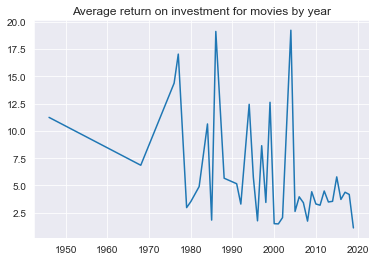

In [ ]:
#examining return on investment over time
fig, ax=plt.subplots()
ax.plot(tmdb_and_budgets.groupby('year')['revenue_to_budget'].mean().index, tmdb_and_budgets.groupby('year')['revenue_to_budget'].mean().values)
ax.set_title('Average return on investment for movies by year');

## Which movie genres produce the highest return on investment?

In [ ]:
genre_rois={}

for row in tmdb_and_budgets.index:
    g_ids=tmdb_and_budgets.iloc[row]['genre_ids']
    rtb=tmdb_and_budgets.iloc[row]['revenue_to_budget']
    for g in g_ids:
        if g in genre_rois.keys():
            genre_rois[g]=np.append(genre_rois[g], rtb)
        else:
            genre_rois[g]=np.array([rtb])

genre_rois_average={}
for g in genre_rois.keys():
    genre_rois_average[g]=genre_rois[g].mean()

genre_rois_average

{'Action': 2.8445543476074677,
 'Adventure': 3.256334414162225,
 'Fantasy': 3.2480465355054586,
 'Science Fiction': 3.607353759756162,
 'Crime': 2.702837128108868,
 'Drama': 3.2386691909339707,
 'Thriller': 5.371078105187498,
 'Western': 1.6573053339634713,
 'Animation': 3.88630585673147,
 'Family': 3.5099992705588554,
 'Comedy': 3.5129645718451865,
 'Horror': 11.009585157813289,
 'Romance': 3.8883719658041738,
 'Mystery': 5.374170979124497,
 'War': 2.356601874654575,
 'Music': 3.2331544464826396,
 'History': 2.516939570721482,
 'Documentary': 3.2652166397885694}

#### Does genre have a statistically significant impact on return on investment?
Before we make recommendations on which genres to invest in, we must first determine whether genre is statistically significant in our data when it comes to predicting return on investment.

In [ ]:
stats.f_oneway(*genre_rois.values())

F_onewayResult(statistic=5.648207136299678, pvalue=7.349557648426371e-13)

Since our p-value is less than 0.05, we conclude that there is a statistically significant difference in return on investment by genre. Therefore we will conduct further analysis to see which genres are the best investments.

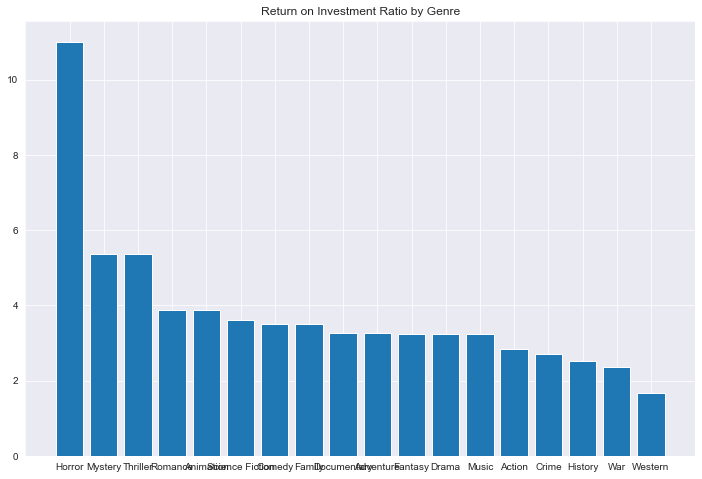

In [ ]:
genre_ids=list(genre_rois_average.keys())
rois=list(genre_rois_average.values())
genres_and_rois=pd.DataFrame(data=rois, index=genre_ids, columns={'Return on Investment'})
genres_and_rois.sort_values(by='Return on Investment', ascending=False, inplace=True)

fig, ax=plt.subplots(figsize=(12,8))
ax.bar(genres_and_rois.index, genres_and_rois['Return on Investment'])
ax.set_title('Return on Investment Ratio by Genre');

We can see that genre 27 has the highest return on investment, followed by genres 9648 and 53.

## What about for current movies only? Are the results different?
Our investor asked us to look specifically at how movies are currently doing in the box office, so we will filter the results further to movies released after 2017.

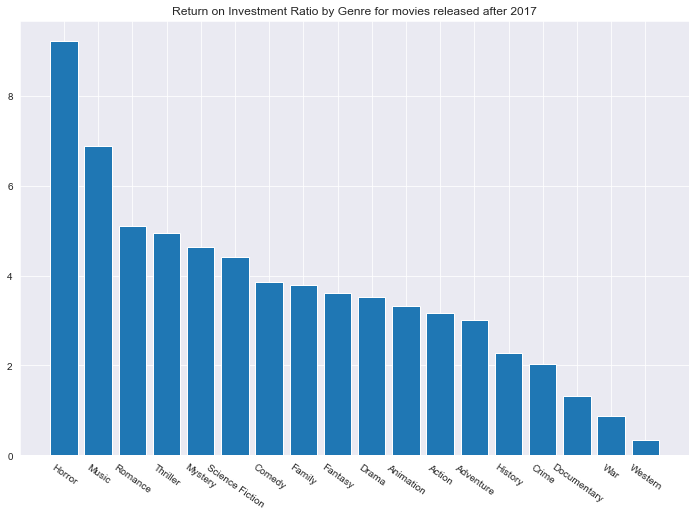

In [ ]:
#repeating the same steps as above, but for new movies only

new_movies=tmdb_and_budgets.loc[tmdb_and_budgets['year']>2017]
new_movies.reset_index(inplace=True)

new_genre_rois={}
for row in new_movies.index:
    g_ids=new_movies.iloc[row]['genre_ids']
    rtb=new_movies.iloc[row]['revenue_to_budget']
    for g in g_ids:
        if g in new_genre_rois.keys():
            new_genre_rois[g]=np.append(new_genre_rois[g], rtb)
        else:
            new_genre_rois[g]=np.array([rtb])

new_genre_rois_average={}
for g in new_genre_rois.keys():
    new_genre_rois_average[g]=new_genre_rois[g].mean()

assert(stats.f_oneway(*new_genre_rois.values())[1]<0.05)

new_movies_genres_and_rois=pd.DataFrame(index=new_genre_rois_average.keys(), data=new_genre_rois_average.values(), columns={'Return on Investment'})
new_movies_genres_and_rois.sort_values(by='Return on Investment', ascending=False, inplace=True)

fig, ax=plt.subplots(figsize=(12,8))
ax.bar(new_movies_genres_and_rois.index, new_movies_genres_and_rois['Return on Investment'])
ax.set_title('Return on Investment Ratio by Genre for movies released after 2017')
ax.set_xticklabels(new_movies_genres_and_rois.index, rotation=-35, ha='center');


Horror still has the highest return on investment, although the gap is not as wide when filtered to new movies only. Music and romance have also done well recently in the box office.

The top genres we recommend are Horror, Music, Romance, Thriller, and Mystery.

In [ ]:
genre_rois

{'Action': array([6.53257713e+00, 2.54667286e+00, 4.24384139e+00, 6.82711400e+00,
        2.18648403e+00, 2.93206974e+00, 3.94341491e+00, 1.42964126e+00,
        9.45462236e-01, 1.02828400e+00, 4.56027765e+00, 3.47000112e+00,
        4.06801427e+00, 3.84146742e+00, 3.78231048e+00, 4.93938507e+00,
        3.42713538e+00, 6.74638176e+00, 2.96888675e+00, 3.44495576e+00,
        1.42489871e+00, 2.77831032e+00, 7.66909239e+00, 3.04285342e+00,
        5.25732893e+00, 1.53551908e+00, 6.74129112e+00, 6.21260356e+00,
        5.24551428e+00, 6.07696136e+00, 5.55263490e+00, 3.73931388e+00,
        3.54498168e+00, 1.09767746e+00, 5.76302843e+00, 2.10232772e+00,
        1.01378258e+00, 7.99327786e+00, 2.45990307e+00, 2.79744553e+00,
        2.16317319e+00, 2.99787315e+00, 3.03282194e+00, 1.81514721e+00,
        1.40193194e+00, 4.70544458e+00, 4.21409297e+00, 1.93834458e+00,
        1.19499087e+00, 1.01666212e+00, 3.04796374e+00, 2.97489166e+00,
        2.08169245e+00, 5.02952200e+00, 4.26319935e+00

## So now that we know what genres are the most profitable, what studios should we pair with? How about directors?